In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv('C:/Users/hp/Desktop/stats_pandas/distacne to port.csv')

# Explore the data
data.head()

,country,country_lo,name,gppd_idnr,capacity_m,latitude,longitude,primary_fu,other_fuel,other_fu_1,...,estimate_2,estimate_3,estimate_4,estimate_5,estimate_6,estimate_7,estimate_8,estimate_9,HubName,HubDist
0,ITA,Italy,ASSEMINI,WRI1002848,177.0,39.2269,8.9972,Oil,NaN,NaN,...,NaN,NaN,261.90,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,NaN,8.339062
1,ITA,Italy,AUGUSTA C.LE,WRI1002849,210.0,37.2083,15.1778,Oil,NaN,NaN,...,NaN,NaN,310.73,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,NaN,3.163200
2,ITA,Italy,LAMARMORA,WRI1002898,116.7,45.5248,10.2273,Oil,NaN,NaN,...,NaN,NaN,172.67,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,NaN,31.902896
3,ITA,Italy,LIVORNO MARZOCCO,WRI1002906,310.0,43.5673,10.3100,Oil,NaN,NaN,...,NaN,NaN,458.69,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,NaN,33.225849
4,ITA,Italy,PIOMBINO TERMICA,WRI1002920,1280.0,42.9565,10.6034,Oil,NaN,NaN,...,NaN,NaN,1893.98,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,NaN,5.286321


Correlation coefficient between distance to nearest port and capacity: 0.15852570047744363
P-value: 0.6415378513820972


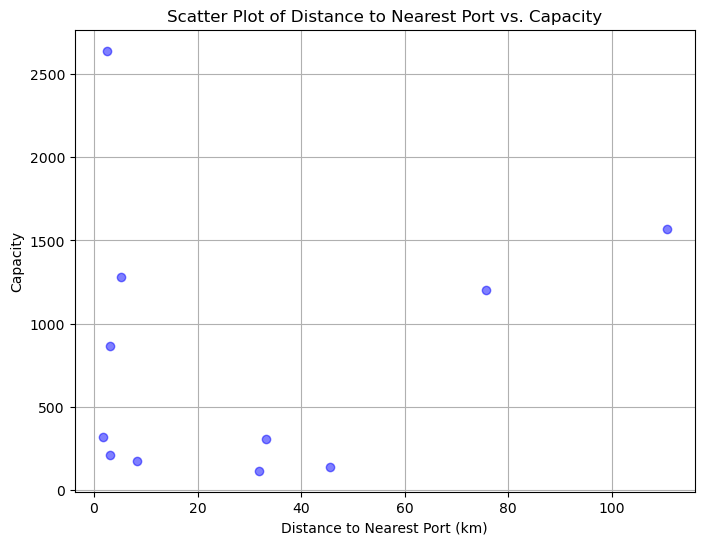

In [4]:
# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(data["HubDist"], data['capacity_m'])

# Print correlation coefficient and p-value
print(f"Correlation coefficient between distance to nearest port and capacity: {correlation_coefficient}")
print(f"P-value: {p_value}")

# Plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['HubDist'], data['capacity_m'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Distance to Nearest Port vs. Capacity')
plt.xlabel('Distance to Nearest Port (km)')
plt.ylabel('Capacity')
plt.grid(True)
plt.show()


In [7]:
# Fit linear regression model
X = data[['HubDist']]
y = data['capacity_m']
regression_model = LinearRegression().fit(X, y)

# Get the coefficients
slope = regression_model.coef_[0]
intercept = regression_model.intercept_
print(f"Linear Regression Model: Capacity = {slope}*Distance_to_port + {intercept}")


Linear Regression Model: Capacity = 3.5519838297461517*Distance_to_port + 698.9042107560185


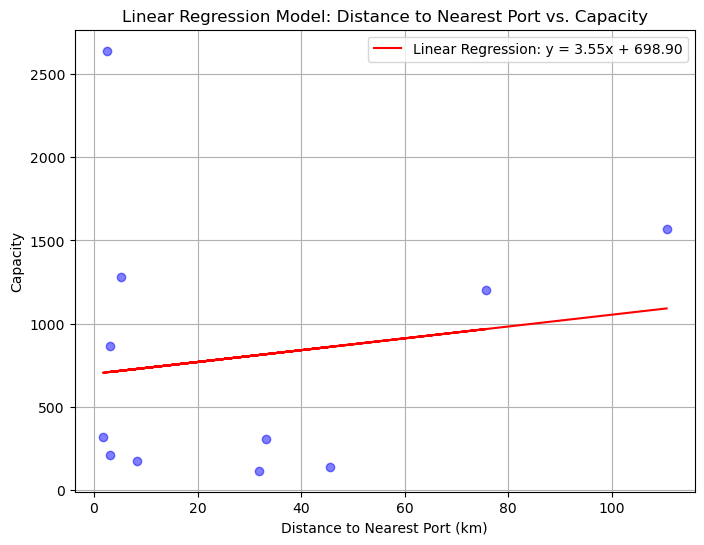

In [9]:
# Plot scatter plot with linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(data['HubDist'], data['capacity_m'], color='blue', alpha=0.5)
plt.plot(data['HubDist'], regression_model.predict(X), color='red', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')
plt.title('Linear Regression Model: Distance to Nearest Port vs. Capacity')
plt.xlabel('Distance to Nearest Port (km)')
plt.ylabel('Capacity')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# Interpretation
if p_value < 0.05:
    significance = "statistically significant"
else:
    significance = "not statistically significant"

print(f"The correlation between distance to nearest port and capacity is {significance} (p < 0.05).")
if correlation_coefficient < 0:
    print("There is a negative correlation between distance to nearest port and capacity.")
else:
    print("There is a positive correlation between distance to nearest port and capacity.")


The correlation between distance to nearest port and capacity is not statistically significant (p < 0.05).
There is a positive correlation between distance to nearest port and capacity.
